# Maneuvers
---

In [41]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from utils import load_data, get_loaders

In [42]:
seed = 42

data_path = 'data/'

### Load Drivers Data

In [43]:
drivers, maneuver_names, dfs = load_data(data_path)

In [44]:
def instantiate_model(model_name, cv):
    """Function to instantiate a model"""

    if model_name == "logreg":
        param_grid = {'penalty':['l1','l2']}
        
        return Pipeline([
            ('scaler', StandardScaler()),  # Data normalization
            ('model', GridSearchCV(LogisticRegression(random_state=seed, solver='liblinear'),
                                    param_grid=param_grid,
                                    cv=cv,
                                    scoring='accuracy',
                                    n_jobs=-1, verbose=0))
        ])

    if model_name == "tree":
        param_grid = {'max_depth': list(range(2,10,2)),
                      'min_samples_split': list(range(2,8,2))}

        return Pipeline([
            ('scaler', StandardScaler()),  # Data normalization
            ('model', GridSearchCV(DecisionTreeClassifier(random_state=seed),
                                    param_grid, 
                                    cv=cv,
                                    scoring='accuracy',
                                    n_jobs=-1, verbose=0))
        ])

## Model for each maneuver

We are going to train a model for each maneuver with the best model configuration as concluded in experimentation notebook:
- Logistic Regression
- Window Size = 100
- No Overlapping

We are going to use the first four drivers to train each model and the last driver (`Driver5`) to test them.

In [45]:
window_size = 100
window_step = window_size

test_driver_index = 4

### 3step-Turnings

In [46]:
X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 0,
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver 3step-Turnings data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (388, 15), X_test (86, 15)
INFO: y_train (388,), y_test (86,)


In [47]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l2'}
Validation accuracy: 0.9031

================ Test set evaluation ================
Test accuracy: 0.8837
Test F1 score: 0.9107
              precision    recall  f1-score   support

 no-maneuver       0.83      0.83      0.83        30
    maneuver       0.91      0.91      0.91        56

    accuracy                           0.88        86
   macro avg       0.87      0.87      0.87        86
weighted avg       0.88      0.88      0.88        86

================== Confusion Matrix ==================
[[25  5]
 [ 5 51]]


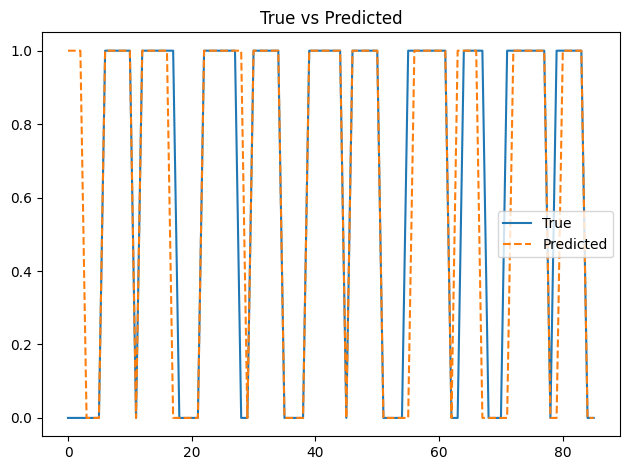

In [48]:
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("True vs Predicted")
plt.tight_layout()
plt.show()

### Overtaking

In [49]:
X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 1,
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver Overtaking data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (252, 15), X_test (61, 15)
INFO: y_train (252,), y_test (61,)


In [50]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l2'}
Validation accuracy: 0.6238

================ Test set evaluation ================
Test accuracy: 0.6393
Test F1 score: 0.5600
              precision    recall  f1-score   support

 no-maneuver       0.58      0.86      0.69        29
    maneuver       0.78      0.44      0.56        32

    accuracy                           0.64        61
   macro avg       0.68      0.65      0.63        61
weighted avg       0.68      0.64      0.62        61

================== Confusion Matrix ==================
[[25  4]
 [18 14]]


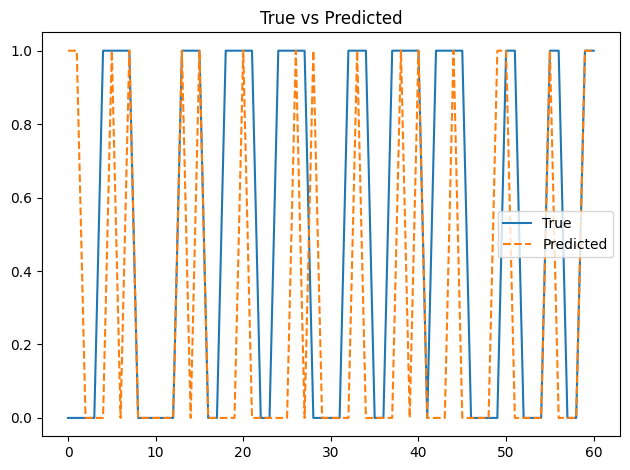

In [51]:
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("True vs Predicted")
plt.tight_layout()
plt.show()

### Stopping

In [52]:
X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 2,
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver Stopping data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (475, 15), X_test (115, 15)
INFO: y_train (475,), y_test (115,)


In [53]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l2'}
Validation accuracy: 0.9139

================ Test set evaluation ================
Test accuracy: 0.9565
Test F1 score: 0.9206
              precision    recall  f1-score   support

 no-maneuver       0.98      0.96      0.97        84
    maneuver       0.91      0.94      0.92        31

    accuracy                           0.96       115
   macro avg       0.94      0.95      0.95       115
weighted avg       0.96      0.96      0.96       115

================== Confusion Matrix ==================
[[81  3]
 [ 2 29]]


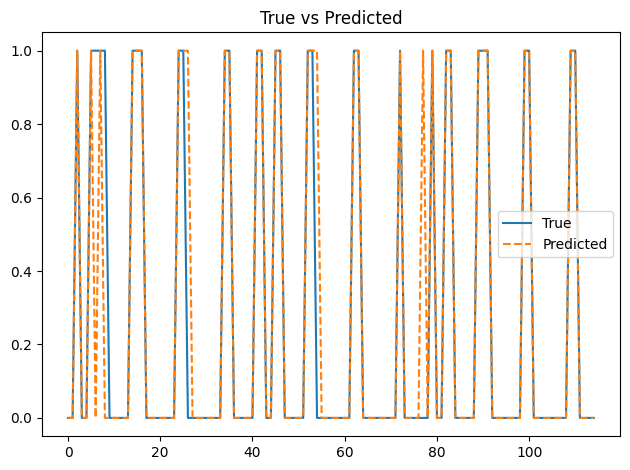

In [54]:
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("True vs Predicted")
plt.tight_layout()
plt.show()

### Turnings

In [55]:
X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 3,
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver Turnings data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (343, 15), X_test (112, 15)
INFO: y_train (343,), y_test (112,)


In [56]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l1'}
Validation accuracy: 0.7930

================ Test set evaluation ================
Test accuracy: 0.8571
Test F1 score: 0.8298
              precision    recall  f1-score   support

 no-maneuver       0.79      0.98      0.88        58
    maneuver       0.97      0.72      0.83        54

    accuracy                           0.86       112
   macro avg       0.88      0.85      0.85       112
weighted avg       0.88      0.86      0.85       112

================== Confusion Matrix ==================
[[57  1]
 [15 39]]


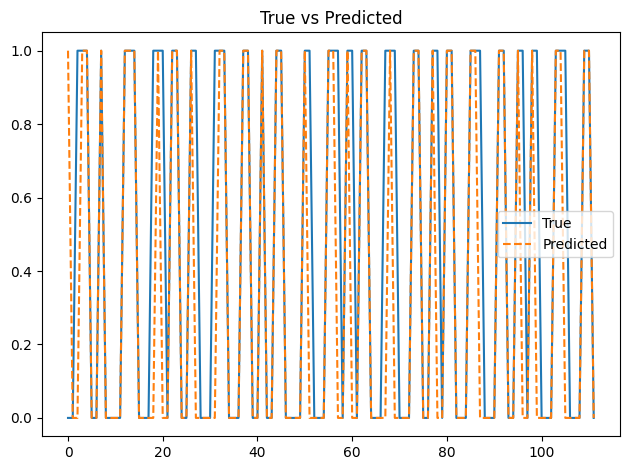

In [57]:
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("True vs Predicted")
plt.tight_layout()
plt.show()

### U-Turnings

In [58]:
X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 4,
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver U-Turnings data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (243, 15), X_test (59, 15)
INFO: y_train (243,), y_test (59,)


In [59]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l1'}
Validation accuracy: 0.8350

================ Test set evaluation ================
Test accuracy: 0.5424
Test F1 score: 0.4000
              precision    recall  f1-score   support

 no-maneuver       0.57      0.70      0.63        33
    maneuver       0.47      0.35      0.40        26

    accuracy                           0.54        59
   macro avg       0.52      0.52      0.52        59
weighted avg       0.53      0.54      0.53        59

================== Confusion Matrix ==================
[[23 10]
 [17  9]]


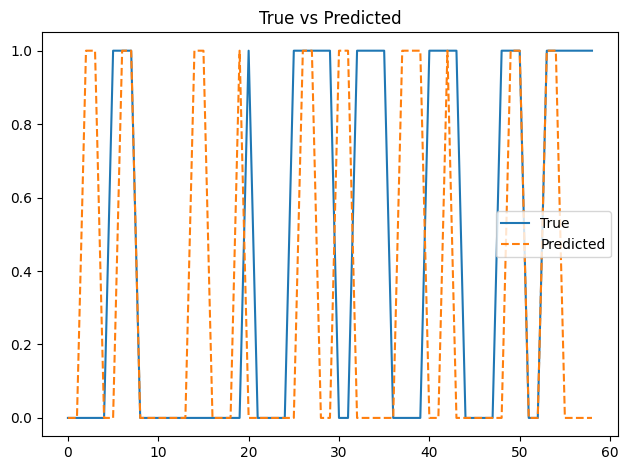

In [60]:
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("True vs Predicted")
plt.tight_layout()
plt.show()

### Results Analysis

In the previous results, we can see that the models for the 3step-Turnings and `Stopping` maneuvers perform particularly well, achieving high F1-scores in the range of 0.91 to 0.93. These high scores indicate that the models are highly effective at correctly identifying these maneuvers while minimizing false positives and false negatives. The strong performance suggests that the features used to distinguish these maneuvers are well-captured, making them easier to classify with high reliability.

The model for the `Turnings` maneuver also performs well, achieving an F1-score of 0.83. While slightly lower than the top-performing maneuvers, this still represents a solid level of accuracy, indicating that the model can reliably detect turning maneuvers. The small drop in performance compared to 3step-Turnings may be due to greater variability in how drivers execute turns, leading to occasional misclassifications.

On the other hand, the models for the `Overtaking` and `U-Turnings` maneuvers show considerably lower performance, with F1-scores of 0.56 and 0.40, respectively. The lower value in `Overtaking` suggests that the model struggles to differentiate overtaking from other driving behaviors, possibly due to similarities with lane changes or inconsistent overtaking patterns among different drivers.

The weakest performance is observed in the `U-Turnings` model, which achieves only 0.4 of F1-score. However, this poor performance is largely attributed to driver biases, meaning that certain drivers execute U-turns in ways that the model has difficulty recognizing. Interestingly, when tested on different drivers, the model achieves better results, indicating that the problem is on the evaluation in the test set (Driver5 data). This is algo seen comparing the cross validation accuracy of the train set and the test set, where the cross validation accuracy is almost 0.84 but the test set accuracy is 0.54.

---

## Explainable Artificial Intelligence (XAI)

In this study, we aim to interpret the inner workings of the logistic regression model, transforming it from a "black box" into an interpretable framework. Our preliminary findings indicate two distinct trends: logistic regression exhibits strong performance on simpler tasks but performs slightly worse on more complex maneuvers (e.g., three-step turns vs. overtaking). This highlights the model's capability to effectively capture linear-like patterns while also revealing its limitations in handling nonlinear dependencies.

In the following sections, we will identify the most influential features in the model and analyze their relationships in the context of maneuver prediction, providing insights into how the model makes its decisions.

### `3step-Turnings`

In [61]:
window_size = 100
window_step = window_size

X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 0,   # 3step-Turnings
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver 3step-Turnings data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (388, 15), X_test (86, 15)
INFO: y_train (388,), y_test (86,)


In [62]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l2'}
Validation accuracy: 0.9031

================ Test set evaluation ================
Test accuracy: 0.8837
Test F1 score: 0.9107
              precision    recall  f1-score   support

 no-maneuver       0.83      0.83      0.83        30
    maneuver       0.91      0.91      0.91        56

    accuracy                           0.88        86
   macro avg       0.87      0.87      0.87        86
weighted avg       0.88      0.88      0.88        86

================== Confusion Matrix ==================
[[25  5]
 [ 5 51]]


#### Most influencial features

##### Logistic Regression Model Coefficients

The logistic regression model we have trained aims to predict the driving maneuver "3step-Turnings". Below is an explanation of the model coefficients and how each feature influences the prediction:


1. **Model Coefficients**:
   - The coefficients of a logistic regression model represent the relationship between each feature and the probability of the "3 step turn" maneuver occurring.
   - A positive coefficient indicates that an increase in the feature value increases the probability of the "3 step turn" maneuver.
   - A negative coefficient indicates that an increase in the feature value decreases the probability of the "3 step turn" maneuver.

2. **Feature Importance**:
   - Features with larger magnitude coefficients (in absolute value) have a greater impact on the model's prediction.

3. **Visualization of Feature Importance**:
   - The following graph and table show the importance of the features in our logistic regression model. The features are ordered by the magnitude of their coefficients, making it easy to identify which ones have the greatest impact on the prediction.


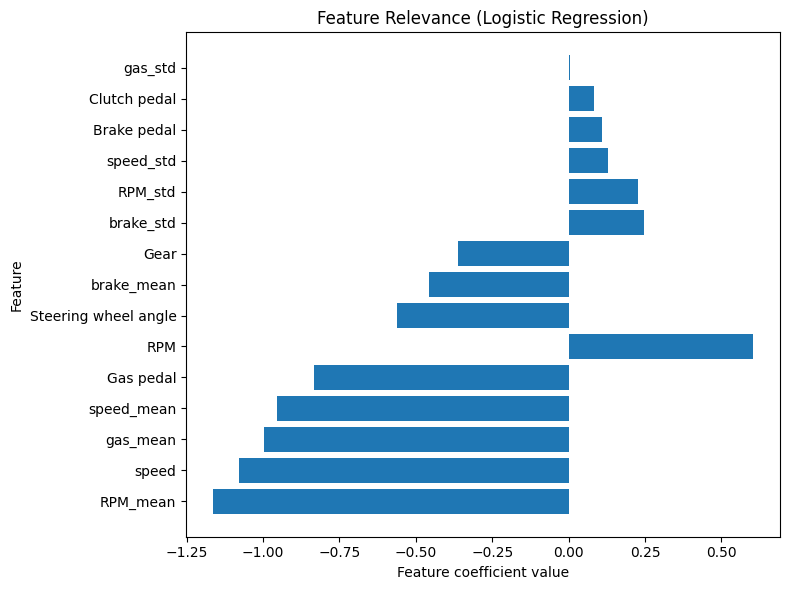

In [63]:
coef = model.named_steps['model'].best_estimator_.coef_[0]
features = X_train.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.barh(coef_df['Feature'], coef_df['Coefficient'])
ax1.set_xlabel('Feature coefficient value')
ax1.set_ylabel('Feature')
ax1.set_title('Feature Relevance (Logistic Regression)')

plt.tight_layout()
plt.show()

4. **Interpretation**:

- **Most important features:**
As shown in the results, the features with the highest impact on the probability of the "3step-Turnings" maneuver are:

    - **RPM_mean**: The average RPM demonstrate a high importance in a "3 step turn" maneuver since they reflect that, during such maneuver, maintaining a lower RPM might be necessary to make sure that the movements of the vehicle are smoothed and controlled, especially when shifting gears and adjusting speed.

    - **speed** and **speed_mean**: The speed and the average speed are other critical features in this maneuver since lower speeds are expected to execute a safe and accurate turn. For this reason, the negative coefficients for these features make sense as higher speeds decrease the likelihood of performing a "3 step turn".

    - **gas_pedal** and **gas_mean**: Similarly to the previous features, the  gas pedal position is directly realted to the vehicle's acceleration. During a "3 step turn", a precise control over the gas pedal is required to ensure the vehicle's smooth transitions during the manneuver. A larger gas pedal input could result in a loss of control. Thus, a higher gas pedal position decreases the probability of a successful "3 step turn".

    - **RPM**: Although the coefficient of the *RPM_mean* feature have a large negative value, a positive value in the RPM suggests that, at certain moments, a higher RPM might also be beneficial during the maneuver and, thus, a good indicator of it taking place.  For isntance, during the initial acceleration or when making precise adjustments, a brief increase in RPM might provide the necessary power for the vehicle and help it execute the maneuver effectively. Therefore, while a high average RPM is detrimental, controlled spikes in RPM at key moments can be beneficial.

    - **Steering wheel angle**: The negative coefficient of this feature indicates that an increase in the steering wheel angle decreases the probability of successfully performing the maneuver. This makes sense because a "3 step turn" requires precise and controlled steering inputs. Large steering angles might indicate oversteering or understeering, which can lead to loss of control and make the maneuver difficult to execute accurately.

- **Least important features:**
As seen in the results, the least important features in predicting the "3 step turn" maneuver are:

    - **speed_std**: The standard deviation of speed (speed_std) has a small positive coefficient. This suggests that variations in speed during the maneuver have a minor impact on the probability of a "3 step turn". While maintaining a consistent speed is generally important, slight variations are less critical compared to the overall speed or average speed. Therefore, speed_std has a minimal influence on the maneuver's success.

    - **Brake pedal**: The brake pedal position also has a small positive coefficient. This indicates that, while braking is necessary to control the vehicle's speed and position during the maneuver, its impact is less significant compared to other factors like RPM and steering angle. The precise modulation of the brake pedal is important, but it does not play as crucial a role as other features.

    - **Clutch pedal**: The small coefficient of this feature suggests that, although engaging and disengaging the clutch is necessary for shifting gears, its impact on the maneuver's success is relatively small. The clutch pedal's role is supportive, ensuring smooth gear transitions, but it is not as critical indicator of the maneuver as other features.

    - **gas_std**: The standard deviation of the gas pedal position has the smallest positive coefficient, with a value of almost 0. This indicates that variations in the gas pedal position during the maneuver have a negligible impact on the probability of a "3 step turn". While maintaining consistent throttle input is generally important, slight variations are less critical to determine the probablity of the maneuver taking place, as compared to the overall throttle position or average throttle input. Therefore, gas_std has a minimal influence on the maneuver's success.

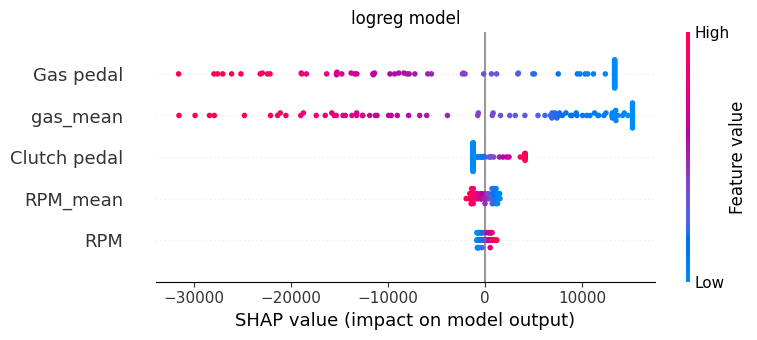

In [64]:
import shap

# Create SHAP Explainer
logreg_model_internal = model.named_steps['model'].best_estimator_

explainer_logreg = shap.Explainer(logreg_model_internal, X_test)
shap_values_logreg = explainer_logreg(X_test)

# Plot Summary
plt.title("logreg model")
shap.summary_plot(shap_values_logreg, X_test, feature_names=X_test.columns, max_display=5)

* **SHAP Plot Interpretation**

This SHAP (SHapley Additive exPlanations) plot shows how much each feature contributes to pushing the model's output away from its base value (the average prediction).

1. **Plot structure**

*   **X-axis (SHAP Value):**  The impact of the feature on the model's output.  Positive SHAP values push the prediction higher (towards the event occurring), and negative values push it lower.
*   **Y-axis (Features):** Lists the features considered by the model.
*   **Dots:** Each dot represents a single data point from your dataset.
*   **Color (Feature Value):** Indicates the *value* of the feature for that data point.  Red generally indicates a high value, and blue indicates a low value.

2. **Interpretation**

*   **Gas pedal & gas_mean:**
    *   **High Impact:** Both gas pedal position and mean gas pedal position seem to have a significant negative impact.
    *   **Negative Correlation:** Red (high gas pedal values) are concentrated on the left side of the zero line, meaning a higher gas pedal position significantly *decreases* the model's output (making it less likely that the predicted maneuver will happen). Likely the maneuver being predicted does *not* involve pressing the gas, and in fact requires lifting the gas pedal to execute.
    *   These are the most impactful features on the model.

*   **Clutch pedal:**
    *   **Smaller Impact:** Clutch pedal has a smaller and possibly mixed impact.
    *   Low clutch pedal values seem to only be slightly correlated to the increase of the model output.

*   **RPM_mean & RPM:**
    *   **Smaller Impact (compared to Gas pedal):** These features have smaller impacts on the model's outcome.
    *   **Blue = Increase, Red = Decrease:**
        *  Both features show an inverse relation, high RPM_mean in previous time window decrease the maneuver prediction while high RPM in present moment increases it.

Considering the 3 step turning maneuver,

* If the gas pedal is pressed, the probability of that maneuver will drop.
* If RPM increases in the present moment, the probability of that maneuver will increase.
* If RPM_mean increases the probability of that maneuver will decrease.


In [65]:
feature1_ind = np.argwhere(X_test.columns=="Gas pedal").squeeze()
feature2_ind = np.argwhere(X_test.columns=="Clutch pedal").squeeze()
feature3_ind = np.argwhere(X_test.columns=="RPM").squeeze()
feature4_ind = np.argwhere(X_test.columns=="RPM_mean").squeeze()

feature_names = ["Gas pedal", "Clutch pedal", "RPM", "RPM_mean"]

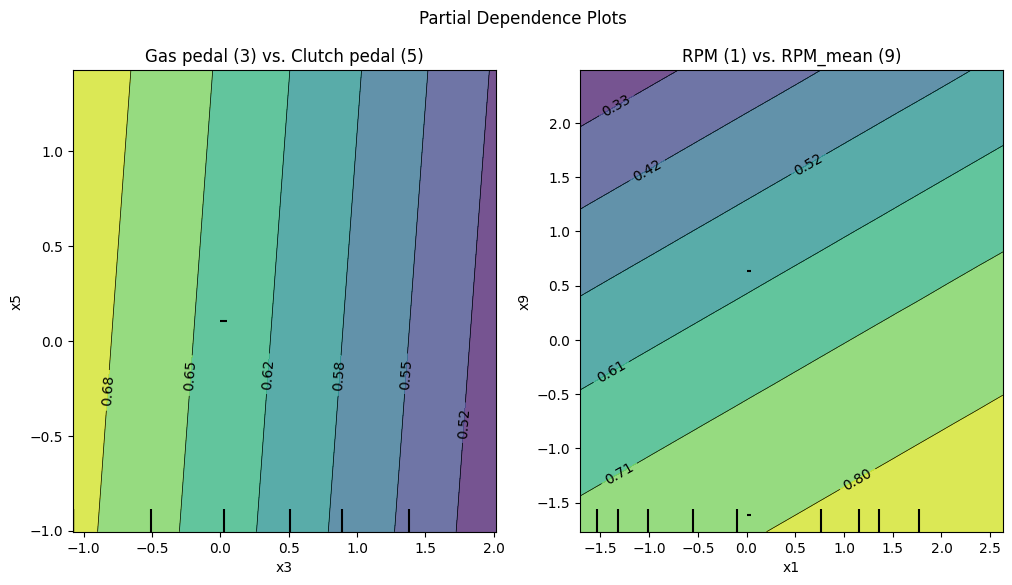

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

scaler = model.named_steps['scaler']
logreg_model_internal = model.named_steps['model'].best_estimator_

X_test_scaled = scaler.transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (f1, f2) in enumerate([(feature1_ind, feature2_ind), (feature3_ind, feature4_ind)]): 
    ax = axes.flatten()[i]
    PartialDependenceDisplay.from_estimator(
        logreg_model_internal, X_test_scaled, features=[(int(f1), int(f2))], ax=ax
    )
    ax.set_title(f"{feature_names[2*i]} ({f1}) vs. {feature_names[2*i+1]} ({f2})")
plt.suptitle("Partial Dependence Plots")
plt.show()


#### Partial Dependence Plots

These plots visualize the partial dependence of the model's prediction on specific pairs of features, averaging out the effects of all other features.  Here, we're analyzing a 3-step turning maneuver. The numbers indicated by the x's mean x(step) or the number assigned to that feature is step x in the 3 step turning maneuver. PDPs assume features are independent, which might not always be true in real-world driving data.

1.**Plot structure:**

*   **Axes:** Each plot shows two features on the x and y axes. The tick marks along the bottom and left indicate the distribution of the features' values in the dataset.
*   **Contour Lines & Color:** Contour lines represent the predicted outcome probability, with color representing the same. Warmer colors (yellow/green) indicate higher probabilities, while cooler colors (blue/purple) represent lower probabilities.

- **Plot 1: Gas pedal (x3) vs. Clutch pedal (x5)**
    Vertical contour lines trend.
    *   **Gas Pedal (x3):** Increasing gas pedal pressure *decreases* the probability of the turning maneuver, represented by the shift from yellow to purple as you move right on the x-axis.
    *   **Clutch Pedal (x5):** The clutch ranges over positive and negative values suggesting that although gas must be low during the maneuver the clutch must change from neutral to lower and to higher gears which is totally the case for 3 step turning.

- **Plot 2: RPM (x1) vs. RPM_mean (x9)**

    *   **RPM (x1):** Higher RPM values in present time increase the probability of the turning maneuver.
    *   **RPM_mean (x9):** Lower values of mean RPM in the previous time window contribute to a higher probability of the turning maneuver.
    *   The previously mentioned inverse relationship is clearly appreciated in this plot.

2.**Overall Interpretation**:

Considering it's a 3-step turning maneuver, the PDPs suggest that the maneuver likely involves:  Low to moderate gas application with the clutch engaged, combined with high instant engine speeds (RPM) with previous lower RPM_mean.




---

### `Stopping`

In [73]:
window_size = 100
window_step = window_size

X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = 2,   # Stopping
    drivers = drivers,
    maneuver_names = maneuver_names,
    dfs = dfs,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver Stopping data
INFO: using driver Driver5 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 100
INFO: X_train (475, 15), X_test (115, 15)
INFO: y_train (475,), y_test (115,)


In [74]:
# Temporal series cross validation
tscv = TimeSeriesSplit(n_splits=5)

model = instantiate_model("logreg", tscv)
model.fit(X=X_train, y=y_train)

best_params = model["model"].best_params_
best_score = model["model"].best_score_
print("=================== Cross Validation ===================")
print("Model best hyper-parameters:", best_params)
print(f"Validation accuracy: {best_score:.4f}")
print()

print("================ Test set evaluation ================")
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test F1 score: {test_f1:.4f}")
print(classification_report(y_test, y_pred_test, target_names=["no-maneuver", "maneuver"]))
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("================== Confusion Matrix ==================")
print(cnf_matrix)

=================== Cross Validation ===================
Model best hyper-parameters: {'penalty': 'l2'}
Validation accuracy: 0.9139

================ Test set evaluation ================
Test accuracy: 0.9565
Test F1 score: 0.9206
              precision    recall  f1-score   support

 no-maneuver       0.98      0.96      0.97        84
    maneuver       0.91      0.94      0.92        31

    accuracy                           0.96       115
   macro avg       0.94      0.95      0.95       115
weighted avg       0.96      0.96      0.96       115

================== Confusion Matrix ==================
[[81  3]
 [ 2 29]]


#### Most influencial features

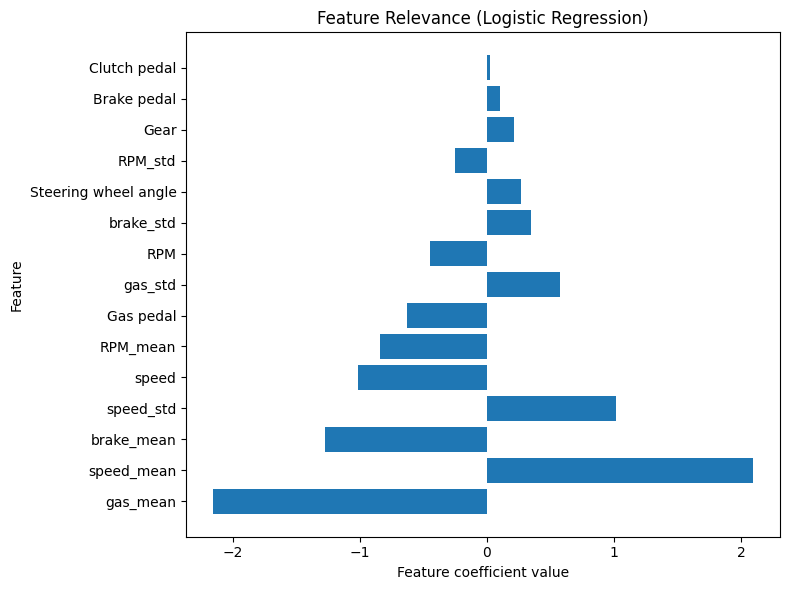

In [75]:
coef = model.named_steps['model'].best_estimator_.coef_[0]
features = X_train.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.barh(coef_df['Feature'], coef_df['Coefficient'])
ax1.set_xlabel('Feature coefficient value')
ax1.set_ylabel('Feature')
ax1.set_title('Feature Relevance (Logistic Regression)')

plt.tight_layout()
plt.show()

- **Most important features:**
  Similarly to the explanation of the coefficients for the "3 step turn" maneuver, as shown in the results, the features with the highest impact on the probability of the "Stopping" maneuver are:

    - **gas_mean**: The average gas pedal position has the highest negative coefficient, indicating that higher average throttle input significantly decreases the probability of stopping. This makes sense because maintaining or increasing throttle input is contrary to the action of stopping the vehicle.

    - **speed_mean**: The average speed has a high positive coefficient, suggesting that higher average speeds increase the probability of stopping. This might seem counterintuitive at first, but it could indicate that the model is capturing scenarios where the vehicle needs to stop from higher speeds. In such scenarios, the vehicle is likely to be traveling at a higher average speed before the need to stop arises. This requires more decisive and immediate braking actions to bring the vehicle to a stop, thus associating higher average speeds with the stopping maneuver.

    - **brake_mean**: The average brake pedal position has a significant negative coefficient, indicating that higher average braking input decreases the probability of stopping. This could suggest that consistent and controlled braking over time is necessary for a smooth and effective stop. When the brake pedal is applied consistently and with moderate pressure, it indicates a controlled stopping maneuver rather than an abrupt or emergency stop. Therefore, higher average braking input over time is associated with a well-executed stopping maneuver.

    - **speed_std**: The standard deviation of speed has a positive coefficient, suggesting that higher variability in speed increases the probability of stopping. This could indicate that fluctuating speeds are associated with the need to stop.

    - **speed**: The instantaneous speed has a negative coefficient, indicating that higher speeds decrease the probability of stopping. This is quite expected for this maneuver, as higher speeds make it more difficult to stop the vehicle quickly.

    - **RPM_mean**: The average RPM has a negative coefficient, suggesting that higher average engine power decreases the probability of stopping. This makes sense because maintaining higher RPMs is contrary to the action of stopping.

    - **Gas pedal**: Finally, the gas pedal position has a negative coefficient, indicating that pressing the gas pedal decreases the probability of stopping. TAgain, this is expected from this feature, since accelerating is contrary to the action of stopping.

- **Least important features:**
  As seen in the results, the least important features in predicting the "Stopping" maneuver are:

    - **Clutch pedal**: The clutch pedal position has a very small positive coefficient, with a value very close to 0, suggesting that engaging the clutch has a minimal impact on the probability of stopping. While the clutch is necessary for shifting gears, its role in stopping migth be less relevant.

    - **Brake pedal**: The brake pedal position has a small positive coefficient, indicating that pressing the brake pedal has a minimal impact on the probability of stopping. A reason for this coeffcient value might be because the model captures the overall braking behavior rather than individual brake pedal inputs.

    - **Gear**: The gear position has a small positive coefficient, suggesting that, while shifting gears is necessary, the specific gear used during the maneuver has a minimal impact on the probability of stopping. 

    - **RPM_std**: The standard deviation of RPM has a small negative coefficient, indicating that variability in RPM has a minimal impact on the probability of stopping. Consistent RPMs might be slightly more important, but their overall influence is minor.

    - **Steering wheel angle**: The steering wheel angle has a small positive coefficient, suggesting that the angle of the steering wheel has a minimal impact on the probability of stopping. While steering is necessary for maneuvering, its role in stopping is not very relevant or a good indicator of the stopping maneuver taking place.

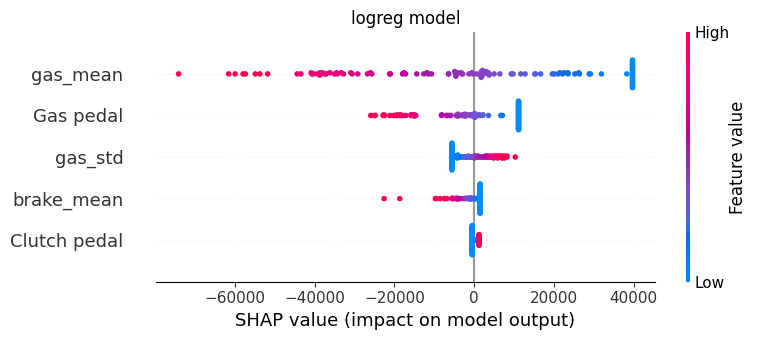

In [76]:
import shap

# Create SHAP Explainer
logreg_model_internal = model.named_steps['model'].best_estimator_

explainer_logreg = shap.Explainer(logreg_model_internal, X_test)
shap_values_logreg = explainer_logreg(X_test)

# Plot Summary
plt.title("logreg model")
shap.summary_plot(shap_values_logreg, X_test, feature_names=X_test.columns, max_display=5)

* **SHAP Plot Interpretation**

This SHAP (SHapley Additive exPlanations) plot shows how much each feature contributes to pushing the model's output away from its base value (the average prediction).

1. **Plot structure**

*   **X-axis (SHAP Value):**  The impact of the feature on the model's output.  Positive SHAP values push the prediction higher (towards the event occurring), and negative values push it lower.
*   **Y-axis (Features):** Lists the features considered by the model.
*   **Dots:** Each dot represents a single data point from your dataset.
*   **Color (Feature Value):** Indicates the *value* of the feature for that data point.  Red generally indicates a high value, and blue indicates a low value.

2. **Interpretation**

*   **Gas pedal & gas_mean:**
    *   **High Impact:** Both gas pedal position and mean gas pedal position seem to have a significant negative impact.
    *   **Negative Correlation:** Red (high gas pedal values) are concentrated on the left side of the zero line, meaning a higher gas pedal position significantly *decreases* the model's output (making it less likely that the predicted maneuver will happen). Likely the maneuver being predicted does *not* involve pressing the gas, and in fact requires lifting the gas pedal to execute.
    *   These are the most impactful features on the model.
    * However, it is important to note that unlike 3step-Turnings, the gas pedal has significantly less impact than gas_mean in the stopping maneuver. This could indicate that in this case, the average of previous gas pedal position over time is more indicative of the stopping maneuver than the instantaneous gas pedal position.

*   **gas_std:**
    *   **Smaller Impact:** gas_std has a smaller and possibly mixed impact.
    *   This feature has a more dispersed impact, with both high and low values affecting predictions in different directions.
    *   Low values (blue) are associated with more positive SHAP values, meaning they may increase the probability of a positive classification.
    *   High values (red) are more mixed but mostly contribute to negative SHAP values.

*   **brake_mean:**
    *   **Smaller Impact:** brake_mean has a smaller impact on the model's outcome.
    *   Negative SHAP values dominate, meaning this feature generally reduces the probability of a positive classification.
    *   Low values (blue) contribute more to positive SHAP values, while high values (red) tend to push predictions in the negative direction.

*   **Clutch pedal:**
    *   **Low Impact:** This feature almost does not have neither negative nor positive impact.

Considering the Stopping maneuver,

* If the gas pedal is pressed, the probability of that maneuver will drop.
* If the gas pedal was pressed in the previous time window, the probability of that maneuver will highly drop.
* If gas_std increases in the previous time window, the probability of that maneuver will increase.
* If the brake pedal was pressed in the previous time window, the probability of that maneuver will slightly drop.

In [79]:
feature1_ind = np.argwhere(X_test.columns=="Gas pedal").squeeze()
feature2_ind = np.argwhere(X_test.columns=="gas_mean").squeeze()
feature3_ind = np.argwhere(X_test.columns=="gas_std").squeeze()
feature4_ind = np.argwhere(X_test.columns=="brake_mean").squeeze()

feature_names = ["Gas pedal", "gas_mean", "gas_std", "brake_mean"]

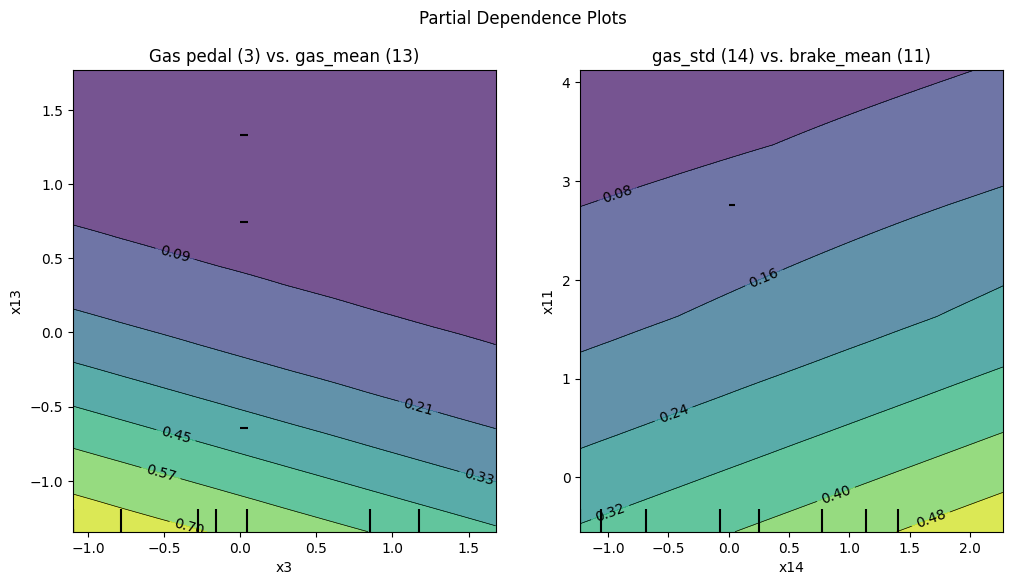

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

scaler = model.named_steps['scaler']
logreg_model_internal = model.named_steps['model'].best_estimator_

X_test_scaled = scaler.transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (f1, f2) in enumerate([(feature1_ind, feature2_ind), (feature3_ind, feature4_ind)]): 
    ax = axes.flatten()[i]
    PartialDependenceDisplay.from_estimator(
        logreg_model_internal, X_test_scaled, features=[(int(f1), int(f2))], ax=ax
    )
    ax.set_title(f"{feature_names[2*i]} ({f1}) vs. {feature_names[2*i+1]} ({f2})")
plt.suptitle("Partial Dependence Plots")
plt.show()


#### Partial Dependence Plots

These plots visualize the partial dependence of the model's prediction on specific pairs of features, averaging out the effects of all other features.  Here, we're analyzing a Stopping maneuver. The numbers indicated by the x's mean x(step) or the number assigned to that feature is step x in the Stopping maneuver. PDPs assume features are independent, which might not always be true in real-world driving data.

1.**Plot structure:**

*   **Axes:** Each plot shows two features on the x and y axes. The tick marks along the bottom and left indicate the distribution of the features' values in the dataset.
*   **Contour Lines & Color:** Contour lines represent the predicted outcome probability, with color representing the same. Warmer colors (yellow/green) indicate higher probabilities, while cooler colors (blue/purple) represent lower probabilities.

- **Plot 1: Gas pedal (x3) vs. Clutch pedal (x5)**
    Vertical contour lines trend.
    *   **Gas Pedal (x3):** Increasing gas pedal pressure *decreases* the probability of the turning maneuver, represented by the shift from yellow to purple as you move right on the x-axis.
    *   **Clutch Pedal (x5):** The clutch ranges over positive and negative values suggesting that although gas must be low during the maneuver the clutch must change from neutral to lower and to higher gears which is totally the case for 3 step turning.

- **Plot 2: RPM (x1) vs. RPM_mean (x9)**

    *   **RPM (x1):** Higher RPM values in present time increase the probability of the turning maneuver.
    *   **RPM_mean (x9):** Lower values of mean RPM in the previous time window contribute to a higher probability of the turning maneuver.
    *   The previously mentioned inverse relationship is clearly appreciated in this plot.

2.**Overall Interpretation**:

Considering it's a 3-step turning maneuver, the PDPs suggest that the maneuver likely involves:  Low to moderate gas application with the clutch engaged, combined with high instant engine speeds (RPM) with previous lower RPM_mean.


